## EJEMPLO

In [7]:
import numpy as np
from scipy.stats import entropy
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [8]:
# tabla = pd.DataFrame(columns=['a_b','a_b_c', 'a_b_c_d', 'a_b_c_d_e', 'si_no'])

In [32]:
X, y = make_blobs(n_samples=1000, n_features=2, centers=2, cluster_std=[1,1])
#X son las coordenadas
#y son el color

In [33]:
X.shape, y.shape


((1000, 2), (1000,))

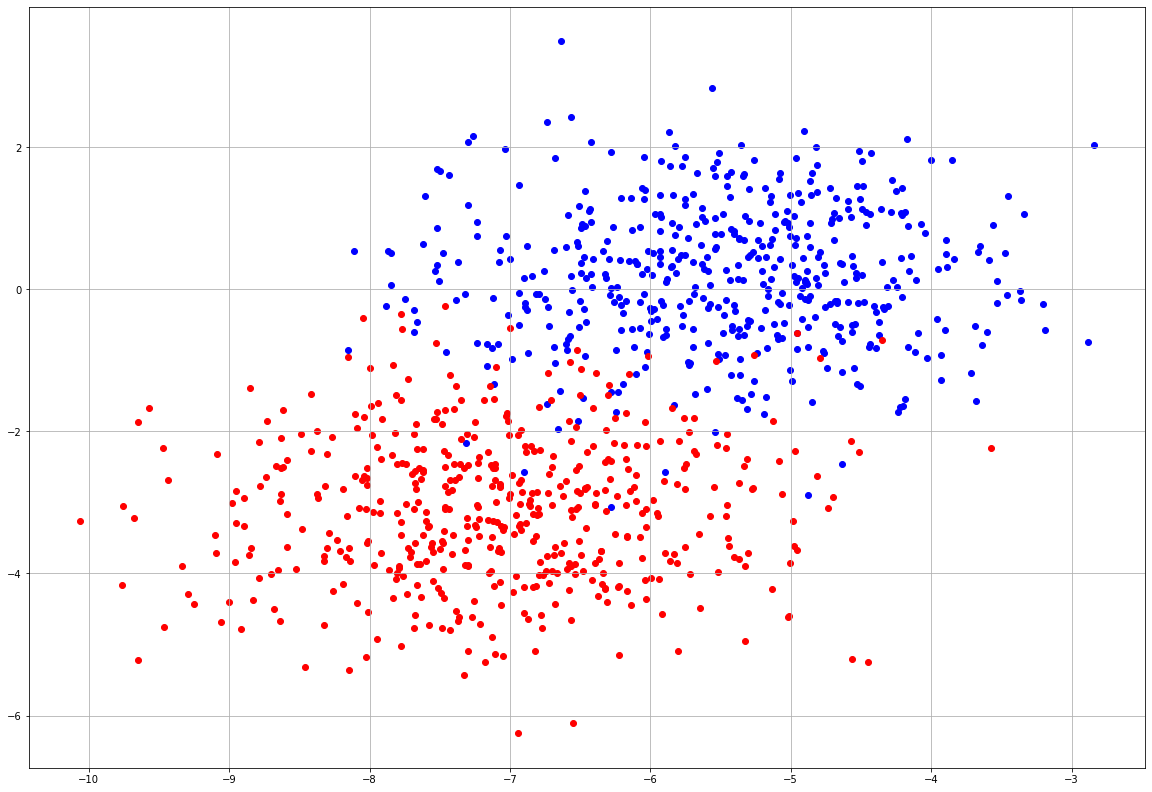

In [34]:
plt.figure(figsize=(20,14))
plt.scatter(X[y==0,0], X[y==0,1], c='b')
plt.scatter(X[y==1,0], X[y==1,1], c='r')
plt.grid()
plt.show()

### NORMALIZACIÓN

In [35]:
scaler = MinMaxScaler()

In [36]:
X = scaler.fit_transform(X)

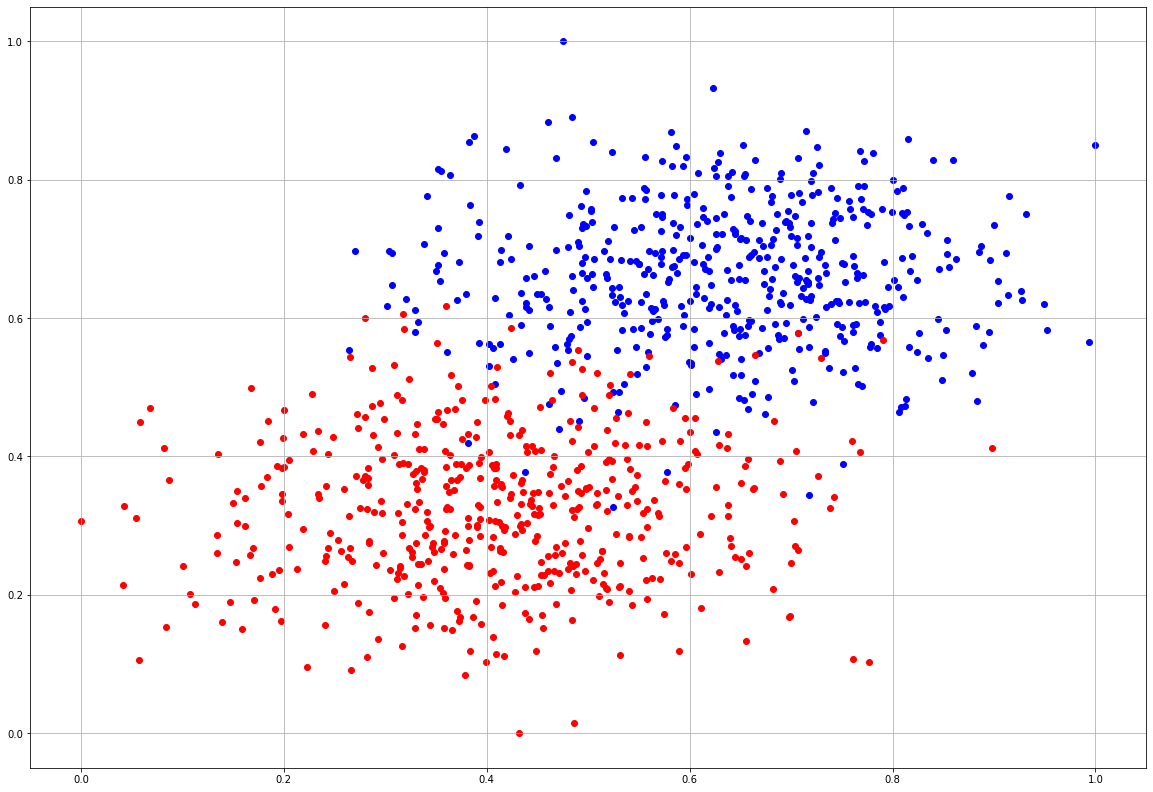

In [37]:
plt.figure(figsize=(20,14))
plt.scatter(X[y==0,0], X[y==0,1], c='b')
plt.scatter(X[y==1,0], X[y==1,1], c='r')
plt.grid()
plt.show()

In [38]:
tabla = pd.DataFrame(columns=['a_b','a_b_c','si_no'], data=np.random.rand(1000,3))
#valores aleatorios en ese tamano
tabla

,a_b,a_b_c,si_no
0,0.993159,0.147996,0.008925
1,0.744051,0.236961,0.806901
2,0.079301,0.590404,0.259432
3,0.622027,0.000411,0.862535
4,0.627463,0.960069,0.916643
...,...,...,...
995,0.076234,0.837975,0.232458
996,0.195437,0.941597,0.113812
997,0.807292,0.293359,0.563931
998,0.699409,0.699282,0.943158


In [39]:
a_b = ['a', 'b']
a_b_c = ['a', 'b', 'c']
si_no = ['no', 'si']

In [40]:
tabla.a_b = [a_b[idx] for idx in np.digitize(X[:,0], bins=[0.5])]
#la primera col de x separa por 0.5

In [41]:
tabla.a_b_c = [a_b_c[idx] for idx in np.digitize(X[:,1], bins=[1/3, 2/3])]

In [42]:
tabla.si_no = [si_no[idx] for idx in np.digitize(y, bins=[0.5])]

In [43]:
tabla

,a_b,a_b_c,si_no
0,a,b,si
1,b,c,no
2,a,b,no
3,a,b,si
4,a,a,si
...,...,...,...
995,b,c,no
996,b,c,no
997,a,a,si
998,a,b,no


In [45]:
#calcula entropia normal
H = entropy(tabla.iloc[:, -1].value_counts(normalize=True), base=2)
print(H)

1.0


In [49]:
G = []
l = len(tabla)
for atributo in tabla.columns[:-1]:
    #menos ultima columna
    G.append(H)
    #anado entrop
    for v in tabla[atributo].unique():
        #cada atributo diferente
        table = tabla.loc[tabla[atributo] == v]
        #cojo tabla con los del atributo solo
        # formula entropia
        G[-1] -= (len(table)/l)*entropy(table.iloc[:, -1].value_counts(normalize=True), base=2)
H, G

    a_b a_b_c si_no
0     a     b    si
2     a     b    no
3     a     b    si
4     a     a    si
5     a     a    si
..   ..   ...   ...
986   a     b    si
993   a     a    si
994   a     a    si
997   a     a    si
998   a     b    no

[465 rows x 3 columns]
    a_b a_b_c si_no
1     b     c    no
8     b     b    no
12    b     b    si
13    b     b    no
17    b     b    no
..   ..   ...   ...
991   b     a    si
992   b     b    no
995   b     c    no
996   b     c    no
999   b     a    si

[535 rows x 3 columns]
    a_b a_b_c si_no
0     a     b    si
2     a     b    no
3     a     b    si
8     b     b    no
10    a     b    no
..   ..   ...   ...
987   b     b    si
988   b     b    no
990   b     b    no
992   b     b    no
998   a     b    no

[488 rows x 3 columns]
    a_b a_b_c si_no
1     b     c    no
11    a     c    no
27    a     c    no
31    b     c    no
32    b     c    no
..   ..   ...   ...
978   b     c    no
980   b     c    no
989   b     c    no
995   b 

(1.0, [0.22170163351512634, 0.5036373438825426])

In [30]:
print("Ganancia MAXIMA en Información (Entropía) =    -", tabla.columns[np.argmax(G)], "-")
#cojo el mayor

Ganancia MAXIMA en Información (Entropía) =    - a_b -


In [20]:
Gi = []
G_Gini = 1-sum(tabla.iloc[:,-1].value_counts(normalize=True)**2)
l = len(tabla)
for atributo in tabla.columns[:-1]:
    Gi.append(G_Gini)
    for v in tabla[atributo].unique():
        table = tabla.loc[tabla[atributo] == v]
        #cojo tabla con solos los del atributo
        #formula gini
        Gi[-1] -= (len(table)/l)*(1-sum(table.iloc[:,-1].value_counts(normalize=True)**2))
G_Gini, Gi

(0.5, [0.4743398973595894, 0.14376623281722017])

In [29]:
print("Ganancia MAXIMA en Información (GINI) =    -", tabla.columns[np.argmax(Gi)], "-")

Ganancia MAXIMA en Información (GINI) =    - a_b -
